In [2]:
#"삼성전자 주가 수익률의 변동성 예측 (GARCH)"
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

In [3]:
# 폰트 수정 
font_path = "C:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname = font_path).get_name()
rc("font", family = font_name)
plt.rcParams['axes.unicode_minus'] = False

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


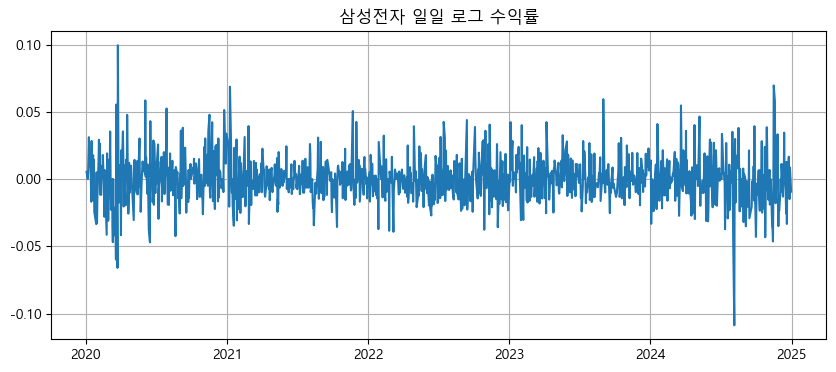

In [4]:
# 삼성전자 데이터 (종가만 사용)
data = yf.download("005930.KS", start="2020-01-01", end="2024-12-31")
data = data[['Close']].dropna()

# 로그 수익률 계산
data['log_return'] = np.log(data['Close'] / data['Close'].shift(1))     #자연로그(t일의 종가/전일 종가)
                                                                     #shift ->종가 데이터를 한 칸 아래 내림
returns = data['log_return'].dropna()                                #nan 값이 있는 첫 번째 행을 제거

# 수익률 시각화
plt.figure(figsize=(10, 4))
plt.plot(returns)
plt.title('삼성전자 일일 로그 수익률')
plt.grid(True)
plt.show()

In [5]:
!pip install arch
from arch import arch_model

# GARCH(1,1) 모델 생성
model = arch_model(returns, vol='GARCH', p=1, q=1)   # vol='GARCH':  GARCH 모델을 사용하겠다는 의미 (vol은 'volatility model' 약자)
result = model.fit(disp='off')  # 콘솔 출력 숨기기

# 요약 결과 보기
print(result.summary())

   ---------------------------------------- 0.0/927.1 kB ? eta -:--:--
   - ------------------------------------- 30.7/927.1 kB 640.0 kB/s eta 0:00:02
   -- ------------------------------------ 61.4/927.1 kB 812.7 kB/s eta 0:00:02
   ------ --------------------------------- 143.4/927.1 kB 1.2 MB/s eta 0:00:01
   -------------------------- ------------- 614.4/927.1 kB 4.3 MB/s eta 0:00:01
   ---------------------------------------- 927.1/927.1 kB 5.8 MB/s eta 0:00:00
                     Constant Mean - GARCH Model Results                      
Dep. Variable:             log_return   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                3328.06
Distribution:                  Normal   AIC:                          -6648.12
Method:            Maximum Likelihood   BIC:                          -6627.67
                                        No. Observation

C:\ProgramData\anaconda3\Lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0002843. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


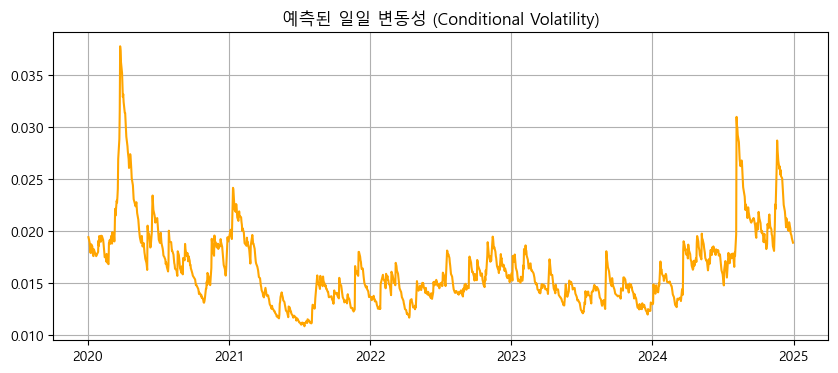

In [6]:
# 조건부 변동성 추출
conditional_vol = result.conditional_volatility     #각 시점에서 예측된 변동성(σₜ) 값을 시계열로 저장한 속성

# 시각화
plt.figure(figsize=(10, 4))
plt.plot(conditional_vol, color='orange')
plt.title('예측된 일일 변동성 (Conditional Volatility)')
plt.grid(True)
plt.show()